- what is capable of achieving X performance?
- reproducibility? 측정한 결과가 다시 나타나는 성질이다.

In [1]:
import torch

random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.5543, 0.4269, 0.3845, 0.5016],
        [0.8229, 0.6836, 0.3829, 0.6193],
        [0.2734, 0.4217, 0.8780, 0.9590]])

Tensor B:
tensor([[0.4971, 0.2539, 0.4471, 0.2460],
        [0.0262, 0.6962, 0.1954, 0.0121],
        [0.2089, 0.9608, 0.4225, 0.7082]])



tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
#set the random seed

import torch
import random

RANDOM_SEED = 42
torch.manual_seed(seed = RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed = RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C ==random_tensor_D

 

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [6]:
!nvidia-smi

Tue Jul  1 17:23:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.59                 Driver Version: 571.59         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A4000             WDDM  |   00000000:73:00.0  On |                  Off |
| 41%   34C    P8             11W /  140W |    1110MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# Count number of devices
torch.cuda.device_count()

1

# 가능한 GPU 연결하는 코드

In [9]:
if torch.cuda.is_available():
    device = "cuda" #Use NVIDIA GPUU
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [ ]:
#Create tensor (default on CPU)
tensor = torch.tensor([1,2,3])

#Tensor not on GPU
print(tensor,tensor.device)

#Move tensor to GPU
tensor_on_gpu = tensor.to(device)
tensor_on_gpu   # 사용가능한 쿠다 1개(인덱스 0부터 시작)

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

# 텐서를 CPU로 이동
- 넘파이는 텐서를 사용하지 않음

In [13]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [15]:
# 대신에 탠서를 CPU로 복사하기
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [16]:
# 복사만 할 뿐 원본 텐서는 여전히 있음
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

In [17]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

# pytorch workflow

In [18]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data (prepating and loading)

In [30]:
#Create *known* parameters

weight = 0.7
bias = 0.3

#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

print(X.size())
X[:10], y[:10]

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### 데이터를 훈련 세트와 테스트 세트로 분할

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]  #train = 40
X_test,y_test = X[train_split:], y[train_split:]  #test = 40

len(X_train),len(y_train), len(X_test), len(y_test) 

(40, 40, 10, 10)

In [45]:
# 시각화 하기
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))
    
    #Plot trainging data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14});
    
    


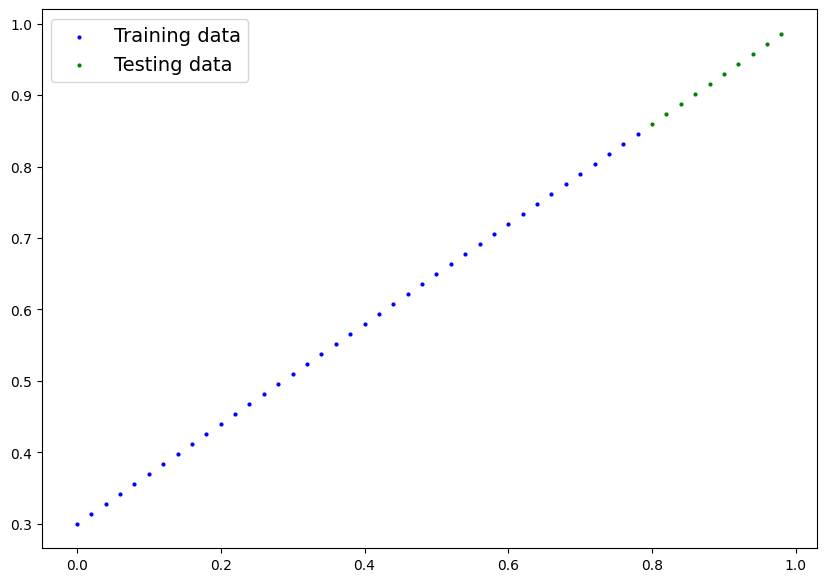

In [44]:
plot_predictions();

## 2. Build model

In [72]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,                         #일단 파라미터와 편향은 임의의 값을 넣는 구나!
                                                dtype = torch.float), # <- start with random weights (this will get adjusted as the model learns)
                                    requires_grad = True) # <- 이 값을 경사하강법으로 업데이트 할 수 있나요?)
                                    
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (모델이 학습함에 따라 조정(get adjusted)될 것이다)
                                             dtype = torch.float),  # <- PyTorch loves float32 by default
                                 requires_grad = True)
        # foward 는 모델에서 계산을 정의한다.
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias               # <- "x" is the input data (e.g. training/testing features) x에 트레인닝/테스트 특징이 들어감감
                                                             # <-The x: torch.Tensor means that the forward() method is expecting x to be of type torch.Tensor.
                                                             # -> torch.Tensor: 도 주석이다 반환값의 유형을 나타낸다.
                           # <- this is the linear regression formula 선형회귀 공식(y = m*x + b)

### Pytorch model building essentials
- torch.nn :Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

- torch.nn.Parameter :	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

- torch.nn.Module :	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

- torch.optim :	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

- def forward()	: All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

### PyTorch 모델의 내용 확인

In [73]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42) 

#Create an instrance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

#Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [74]:
# List named parameters
model_0.state_dict()
# 우리 모델은 무작위 값으로 시작하기 때문에 지금 당장은 예측력이 낮습니다.

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### torch.inference_mode()를 사용하여 예측 만들기
- 학습 하는 것이 아닌 예측하기(추론 전용)
- torch.inference_mode()학습에는 필요하지만 추론에는 필요하지 않은 그래디언트 추적과 같은 여러 가지 기능을 꺼서 전방 패스 (데이터가 메서드를 통과하는 forward()과정)를 더 빠르게 만듭니다.


In [75]:
# 모델로 예측하기
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [77]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")
print(X_test)

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


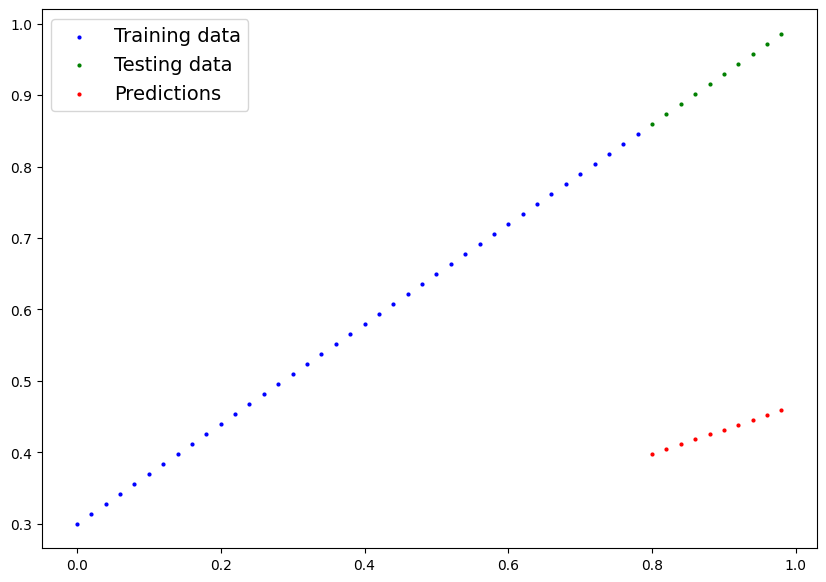

In [78]:
plot_predictions(predictions=y_preds)

In [79]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3. Train model(드디어 모델을 학습시킨다)

### Creating a loss function and optimizer in PyTorch
- 모델이 매개변수를 스스로 업데이트하려면 몇 가지 사항을 추가해야 합니다.
- loss functio : 모델 예측과 실제 레이블 비교 시 얼마나 틀렸는지 측정(낮을수록 좋음음),torch.nn.(L1Loss = 회귀 문제에 대한 평균 절대 오차(MAE) or BCELoss =분류 문제(특정 대상 예측)에는 이진 교차 엔트로피)
- optimizer : 손실을 가장 낮추기 위해 모델의 내부 매개변수를 업데이트하는 방법을 알려줌,torch.optim.((SGD확률적경사하강법) or Adam)

- 이 예시에선 평균 절대 오차(두 지점 간의 절대 차이를 측정 후 모든 예시에 대한 평균 구하기)과 SGD 사용
- torch.optim.SGD(params, lr)
- params :the target model parameters you'd like to optimize 평향과 가중치
- lr : learing rate (옵티마이저가 매개변수를 업데이트할 학습속도) 길을 찾는 과정이라고 보면 됨. 너무 큰 매개변수 조정은 길을 지나칠 수 있어 불안정하고 너무 작으면 학습 속도가 느려져. 보통 0.01,0.001,0.0001 사용

In [80]:
# Create the loss function
loss_fn = torch.nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), # parameters of target model to optimize
                            lr = 0.01)

### PyTorch 에서 최적화 루프 만들기기
-The training loop involves the model going through(살펴보다) the training data and learning the relationships between the features and labels. (둘 간의 관계를 학습하는 과정)

-The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

#### PyTorch training loop
- 1 Forward pass : model(x_train)
- 2 Calculate the loss : loss = loss_fn(y_pred, y_train)
- 3 Zero gradients : optimizer.zero_grad()
- 4 Perform backpropagation on the loss : loss.backward() (각 매개변수에 업데이트할 손실의 기울기, 이를 역전파라고 함함 )
- 5 Update the optimizer (gradient descent) : optimizer.step() (손실함수를 개선하기 위한 매개변수 업데이트 )

#### PyTorch testing loop
- 1 Forward pass : model(x_test) 이 모델은 모든 테스트 데이터를 한 번씩 살펴보고 forward()함수 계산을 수행합니다.
- 2 Calculate the loss : loss = loss_fn(y_pred, y_test) 얼마나 틀렸는지 평가한다
- 3 Calulate evaluation metrics (optional)"손실 값(loss value)과 함께, 테스트 세트에서 정확도(accuracy) 같은 다른 평가 지표들도 계산하고 싶을 수 있다." 왜냐하면 손실값만 같고 정확도가 틀리면 안되기 때문이다. (사용자 지정)

In [83]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100
#값을 추적하기 위한 빈 손실 리스트 만들기
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ###Training
    
    #Put model in training mode (this is the default state of a model) 모델을 훈련(학습) 모드로 훈련 모드는 원래 기본값이다.
    # 드롭아웃(dropout) → 켬
    # 배치 정규화(batch norm) → 학습용 동작을 하게 설정
    model_0.train()
    
    # 1. Forward pass on train data using the forward() method inside forward 매서드 이용해서 학습 데이터 순전파시켜 예측값 가지고 오기
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss (how different are our models predictions to the ground truth) 모델 예측이 실제 결과와 얼마나 다른가 예측
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad of the optimizer 
    optimizer.zero_grad()
    
    # 4. Loss backwards
    loss.backward()
    
    # 5. Progress the optimizer
    optimizer.step()
    
    ### Testing
    
    # Put the model in evaluation mode
    model_0.eval()   #모델을 **“평가 모드”**로 바꿔줌	드롭아웃 : 학습할 때 뉴런을 확률적으로 끔(과적합 방지지), 배치 정규화 등을 끌 때
    
    # torch.inference_mode() :그래디언트 계산을 완전히 비활성화해서 속도와 메모리 최적,학습이 아닌 예측 전용일 때 사용
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)
        
        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # 예측값은 torch.float 유형이므로 맞춰줘야 함.
        
        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    
    
    


Epoch: 0 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 10 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842222690582 
Epoch: 20 | MAE Train Loss: 0.08227583020925522 | MAE Test Loss: 0.2069590985774994 
Epoch: 30 | MAE Train Loss: 0.05181945487856865 | MAE Test Loss: 0.14023718237876892 
Epoch: 40 | MAE Train Loss: 0.04503796249628067 | MAE Test Loss: 0.11182951927185059 
Epoch: 50 | MAE Train Loss: 0.04132963344454765 | MAE Test Loss: 0.09809747338294983 
Epoch: 60 | MAE Train Loss: 0.03785243630409241 | MAE Test Loss: 0.08776430785655975 
Epoch: 70 | MAE Train Loss: 0.03441363573074341 | MAE Test Loss: 0.0794917643070221 
Epoch: 80 | MAE Train Loss: 0.030979642644524574 | MAE Test Loss: 0.07190609723329544 
Epoch: 90 | MAE Train Loss: 0.02754882536828518 | MAE Test Loss: 0.06363357603549957 


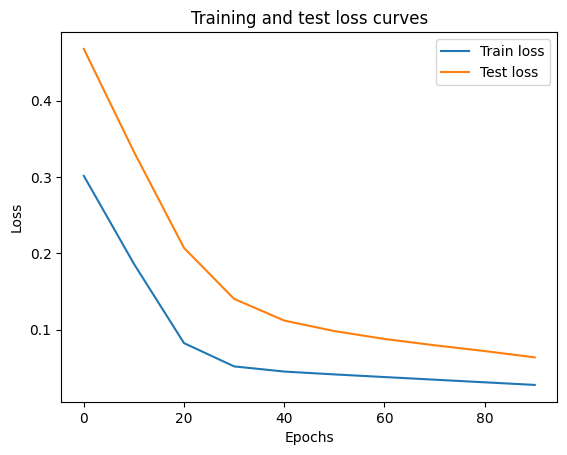

In [85]:
# 그래프로 확인하기
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

plt.show()


In [86]:
#모델의 학습된 매개변수 찾기
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.5800]), 'bias': tensor([0.3503])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


- 이것이 머신 러닝과 딥 러닝의 전체적인 아이디어입니다.
- 데이터를 설명하는 이상적인 값이 존재하고 , 이를 직접 알아내는 대신 모델을 훈련시켜 프로그래밍 방식으로 이를 알아낼 수 있습니다 .

## 4. 훈련된 PyTorch 모델을 사용하여 예측하기(추론)
- 기억해야 할 3가지

- 1. 모델을 평가 모드( model.eval())로 설정
- 2. 추론 모드 컨텍스트 관리자( with torch.inference_mode(): ...)를 사용하여 예측 (1,2번은 예측에 필요하지 않는 것을 꺼서 계산 속도 증가)
- 3. 모든 예측은 동일한 장치의 객체를 사용하여 이루어져야 한다. GPU에만 있는 데이터와 모델 또는 CPU에만 있는 데이터와 모델(여러 장치 간의 오류 방지)

In [88]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds


tensor([[0.8143],
        [0.8259],
        [0.8375],
        [0.8491],
        [0.8607],
        [0.8723],
        [0.8839],
        [0.8955],
        [0.9071],
        [0.9187]])

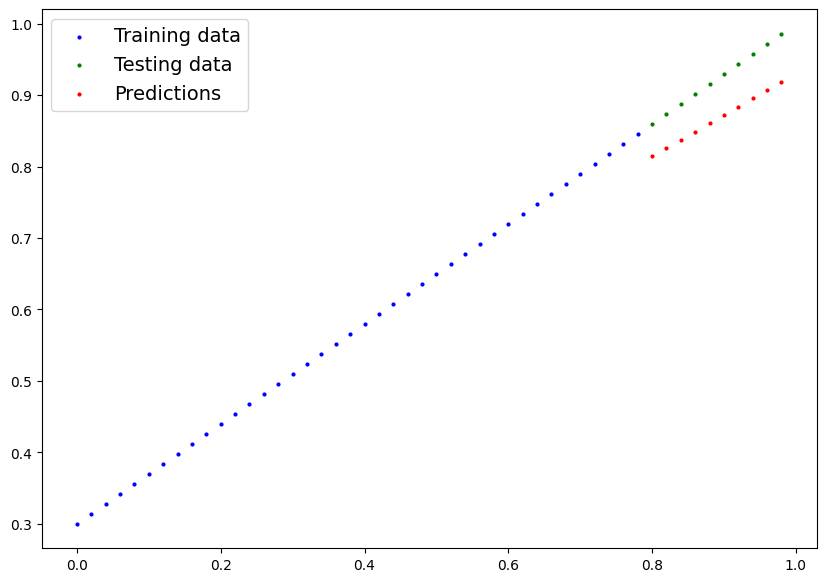

In [89]:
# 훈련된 모델의 테스트 값이 어떻게 바뀌었나?
plot_predictions(predictions = y_preds)

## 5. PyTorch model 저장 및 불러오기

In [90]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_0.pth


In [91]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [93]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [94]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)